# Obesity Risk Prediction Project 

An excessive amount of body fat is called obesity. Obesity is not only about food genetic, and environmental can be the cause of obesity. In
the future, it can be a threat to the world as it is a worldwide health concern. Obesity occurs due to many reasons also, it can be named a
disease. Thousands of risks and diseases are associated with obesity. It is one of the most common health problems all over the world. Excessively eating and moving too little is the principal reason for obesity. If people do not burn off their energy through physical activities, such as yoga, exercises, and so on, but take high amounts of energy, particularly fat and sugars, then much of the surplus energy is converted into fat and stored in the body. Most people are not concerned about their obesity as they thought it was one of the general health definitions. Also, they contemplate that it does not affect their health. It is just the outer structure of their body. But the unfortunate reality is most of the diseases are associated with obesity. Sometimes it can cause death, as it has been identified by devastating epidemics for diabetes, cardiovascular disease, malignancy, osteoarthritis, persistent kidney disease, stroke, hypertension, and fatal diseases.

This project solely aims to predict the chance of whether a person is considered obese or not using the *Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico*, published on the University of California Irvine Machine Learning Repository, [Link to dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Attribute information**
1. What is your gender? (**Gender**) = Female, Male
2. What is your age? (**Age**) = Numeric value
3. What is your height? (**Height**) = Numeric value in meters
4. What is your weight? (**Weight**) = Numeric value in Kilograms
5. Has a family member suffered or suffers from overweight(**family_history_with_overweight**)? = Yes, No
6. Do you eat high caloric food frequenlty? (**FAVC**) = Yes, No
7. Do you usually eat vegatables in your meals? (**FCVC**) = 1-3 follow by usually meal
8. How many main meals do you have daily? (**NCP**) = Between 1 y 2, 3, more than 4
9. Do you eat any food between mean? (**CAEC**) = No, Sometimes, Frequently, Always
10. Do you smoke? (**Smoke**) = Yes, No
11. How much water do you drink daily? (**CH20**) = less than a liter, between 1 and 2L, more than 2 L
12. Do you monitor the calories you eat daily? (**SCC**) = Yes, No
13. How often do you have physical activity? (**FAF**) = I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 day
14. How much time do you use technological devices? (**TUE**) = 0-2 hours, 3-5 hours, more than 5 hours
15. How often do you drink alcohol? (**CALC**) =I don't drink, Sometimes, Frequently, Always
16. Which transportation do you usually use? (**MTRANS**) = Automobile, Motorbike, Bike Public Transportation, Walking

The outline to the project is as follow:

**1. Exploratory Data Analysis**

**2. Data Preprocessing**

**3. Machine Learning Model**

**4. Conclusion**

# Import libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV 
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
df = pd.read_csv(r"C:\Users\Khoi\Desktop\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# 1. Exploratory Data Analysis

In [4]:
df.shape

(2111, 17)

**The dataset has 2111 records and 17 dimensions.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**There is no missing value in this dataset.**

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [9]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

## 1.1. Gender

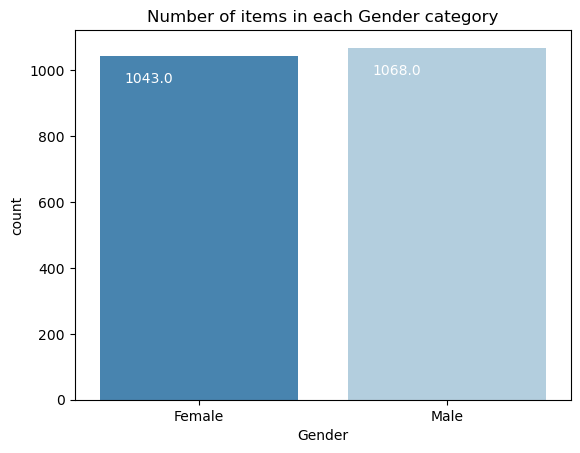

In [10]:
count_values(df, "Gender")

**There seems to be a balanced distribution between the 2 genders in the dataset.**

## 1.2. Age

In [11]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [12]:
df["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [13]:
df["Age"].median()

22.77789

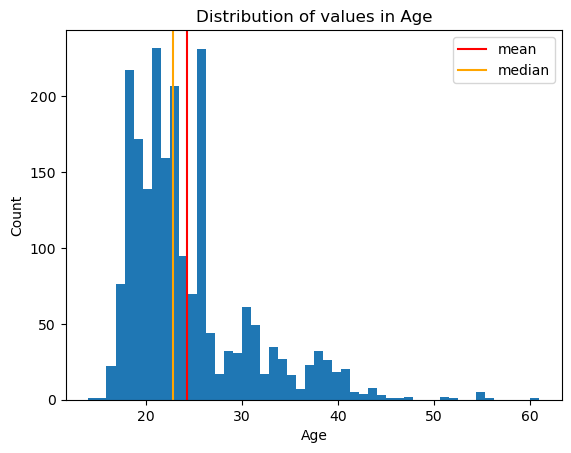

In [14]:
plot_distribution(df, "Age")

The youngest person in the dataset is 14 years old, and the oldest one - 61 years of age. Values in this column are not normally distributed; the historgram is positively skewed with mean (24.31) and median (22.78) closer to the lower bound.

## 1.3. Height

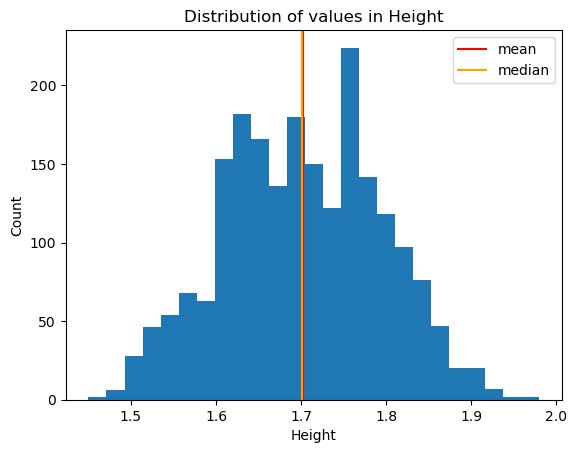

In [15]:
plot_distribution(df, "Height")

Obesity is determined by computing the *Body mass index (BMI)*. It is a function of a person's height and weight. The exact formula is:
$$ BMI = \frac{Weight}{Height^2} $$
Thus, height is an important element for determining obesity.
Distribution of height values is plotted above. Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70. Still, height values do not seem to follow normal distribution.

## 1.4. Weight

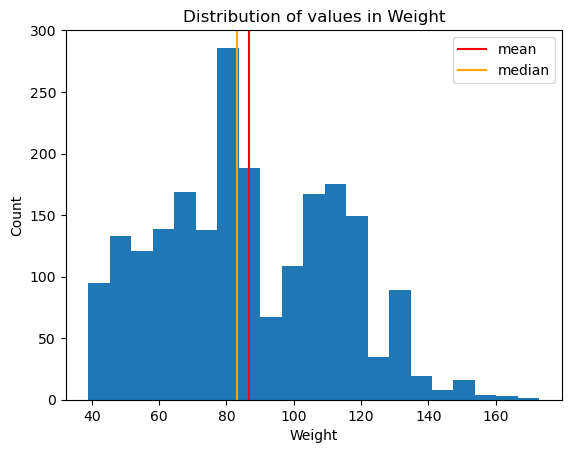

In [16]:
plot_distribution(df, "Weight")

Weight does not offer interesting observations. Distribution is more or less bi-modal; the mean and the median are shifted to the left because of the larger number of people weighting less than 80 kg.

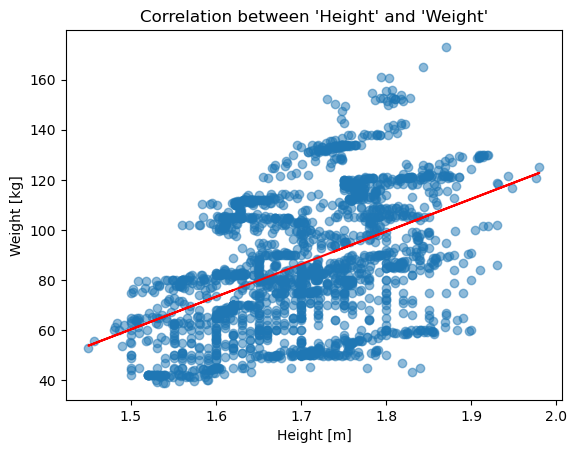

In [17]:
plt.scatter(df["Height"], df["Weight"], alpha = 0.5)
m, b = np.polyfit(df["Height"], df["Weight"], 1)
plt.plot(df["Height"], m * df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

It would be interesting to see if there is any relationship between "Height" and "Weight" since both metrics are used to compute Body mass index. Furthermore, these are the most important features for predicting if a person suffers from overweight/obesity.
The code line above plots each person's weight and height. The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. In other words, taller people are more likely to weight more.

## 1.5. Does overweight run in the family?

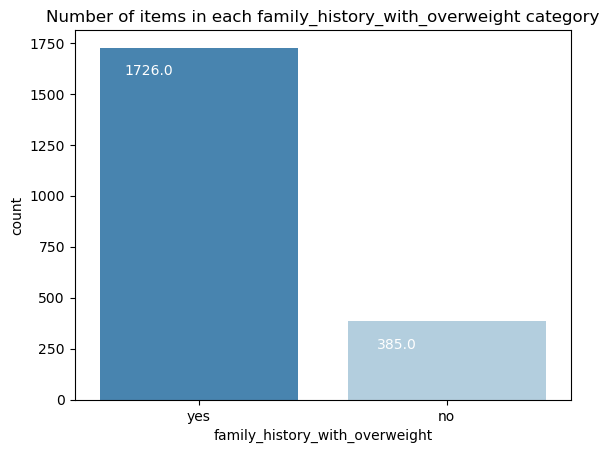

In [18]:
count_values(df, "family_history_with_overweight")

When inquired about whether their relatives experienced issues with being overweight, the majority responded in the affirmative.

## 1.6. Consumption of high caloric food

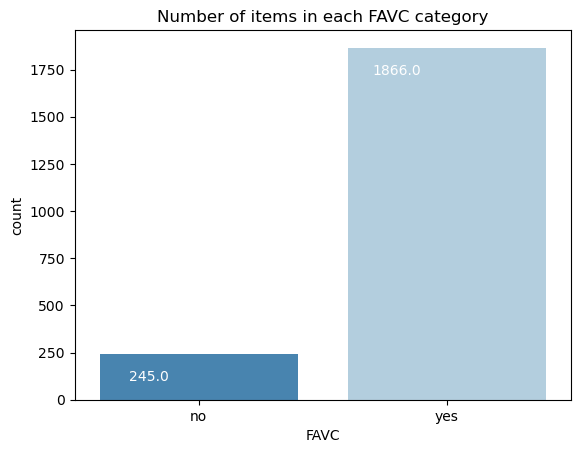

In [19]:
count_values(df, "FAVC")

Survey respondents had to say if they eat high caloric food frequenty. There were only two possible answers: "yes" or "no". Most of them (ca. 88%) admitted they consume high caloric food.

## 1.7. Consumption of vegetables

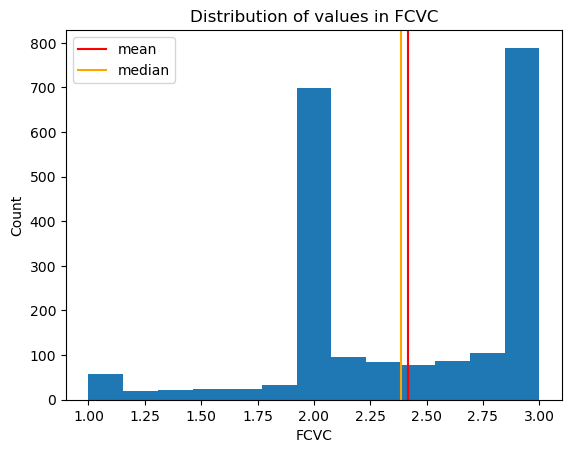

In [20]:
plot_distribution(df, "FCVC")

"FCVC" column denotes if people consume vegetables. Possible answers were "Never", "Sometimes", and "Always". It is not clear why values are numeric and not categorical (discrete) ones. It could be assumed that "3" means "Always", "2" - "Sometimes", and "1" - "Never", but it is not clear what the values inbetween mean.

## 1.8. Meals per day

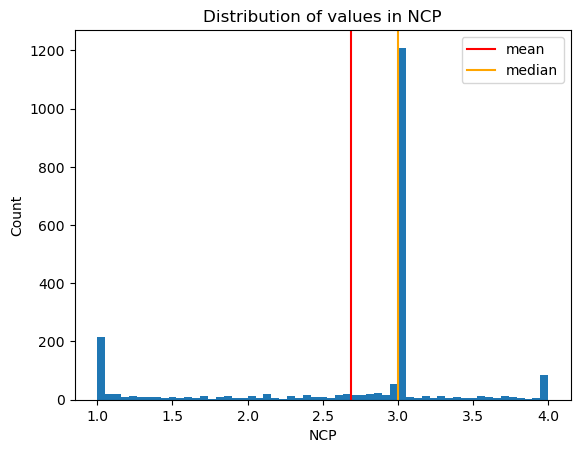

In [21]:
plot_distribution(df, "NCP")

Similarly, repondents had to point the number of main meals they have daily: "Between 1 and 2", "Three", and "More than three". Instead of categorical, this feature also holds numerical values. Mean and median are not informative here either.

## 1.9. Food between meals

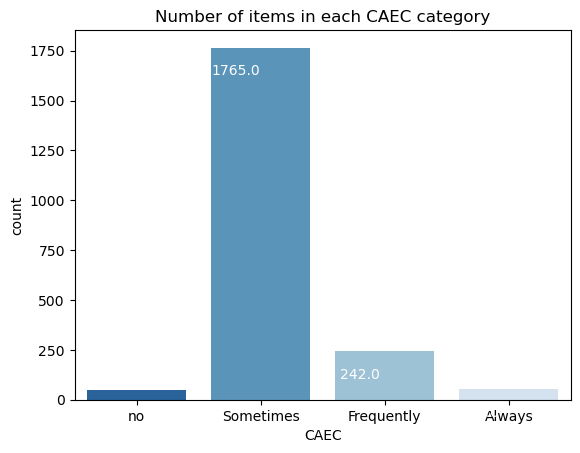

In [22]:
count_values(df, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

People had to say if and how offen they eat between meals. They could answer eigher "No" (if they do not get bites between regular time for eating), or "Sometimes", "Frequently", or "Always". The data suggests that most people "sometimes" get small snacks between meals.

## 1.10. Smoking habit

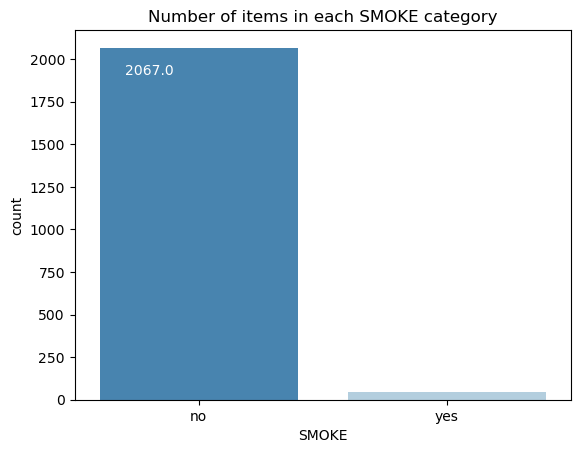

In [23]:
count_values(df, "SMOKE")

Most respondents do not smoke, only 44 of them smoke.

## 1.11. Drinking water habit

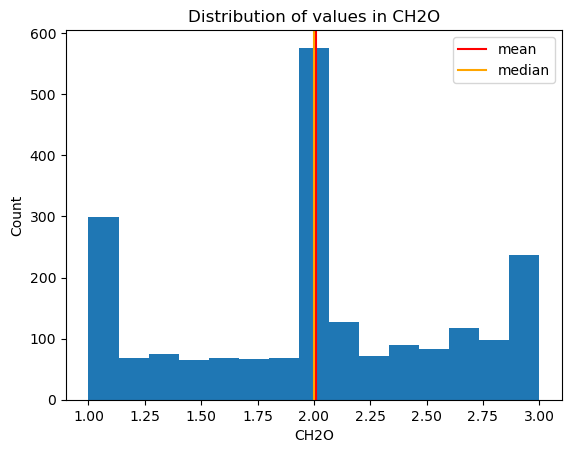

In [24]:
plot_distribution(df, "CH2O")

Drinking water habits should have been categorised in three groups: "Less than a litter", "Between 1 and 2 L", and "More than 2 L". Instead, the answeres are entered as continuous values. Their distribution (not very informative, too) is shown below, with many of them drinking 2 litres of water per day.

## 1.12. Monitor intake of calories

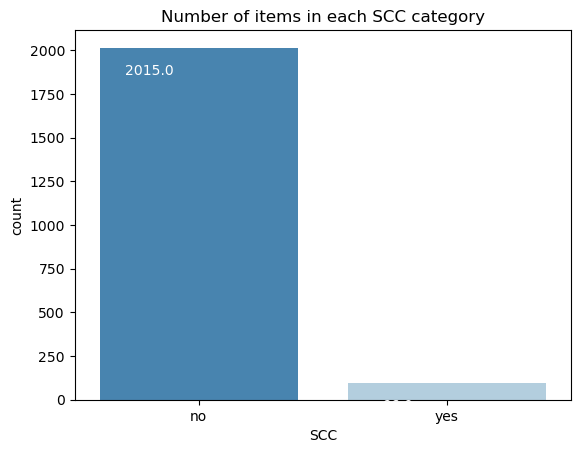

In [25]:
count_values(df, "SCC")

It seems people do not worry about the calories they get daily. On the other hand, they might not have been aware of the nutritional value and ingredients of each food if these were not listed on the packing.

## 1.13. Physical activity

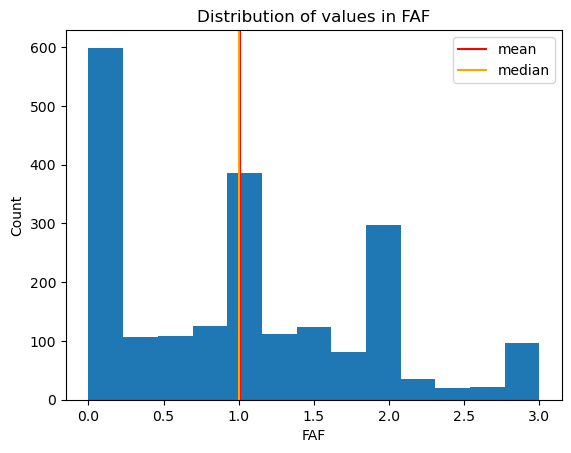

In [26]:
plot_distribution(df, "FAF")

Respondents were asked to share their physical activity. They had to choose 1 out of 4 optional answers: "I do not have", "1 or 2 days", "2 or 4 days", and "4 or 5 days". Values in "FAF" column are continuous instead of categorical ones. These are plotted above but their distribution (as well as mean and median) are hard for interpretation.

## 1.14. Physical inactivity

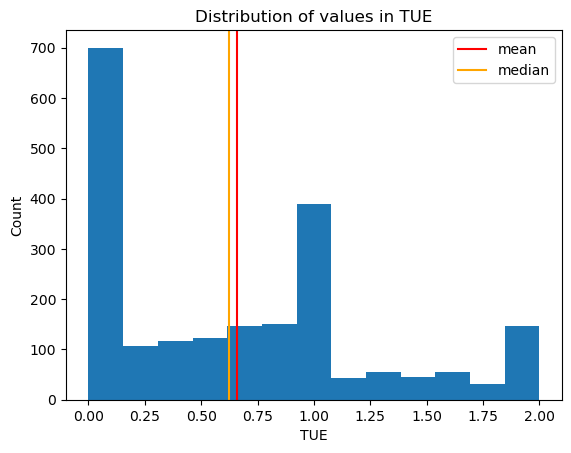

In [27]:
plot_distribution(df, "TUE")

Similarly, people were asked to state how much time they spend on using technological devices such as cell phone, videogames, television, computer, etc. They could say "0-2 hours", "3-5 hours", and "More than 5 hours". Responses are stored as continuous values. Their distribution, which could not be interepreted, is shown above.

## 1.15. Drinking alcohol

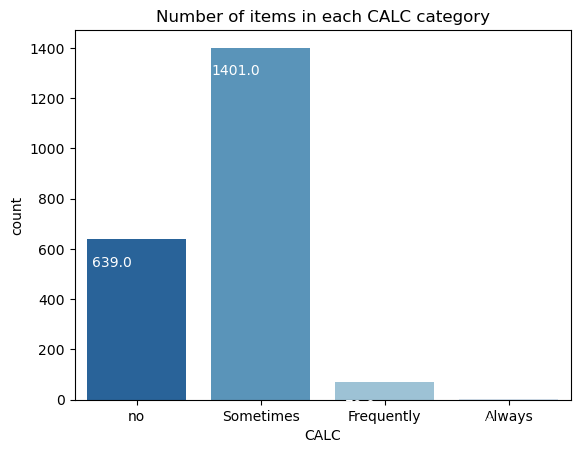

In [28]:
count_values(df, "CALC")

Most people drink alcohol "sometimes", but almost a third claim they do not consume any alcoholic beverages.

## 1.16. Transportation

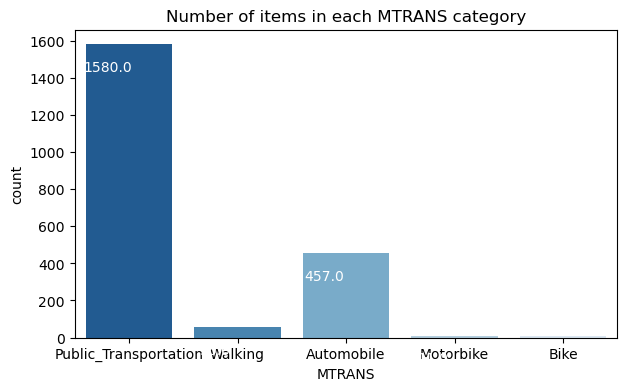

In [29]:
plt.figure(figsize = (7, 4))
count_values(df, "MTRANS")

Most people (around 3/4) rely on public transportation. Much fewer respondents use their cars. The remainder either commute or use a bike or motorbike.

## 1.17. Normal, Overweight or Obese?

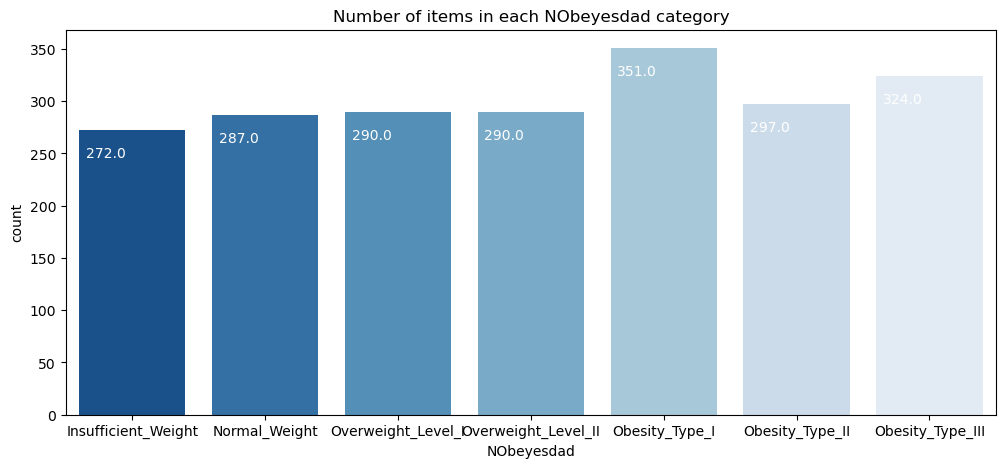

In [30]:
plt.figure(figsize = (12, 5))
count_values(df, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

People, according to their Body mass index (BMI), are categorised as:
- Underweight if BMI < 18.5
- Normal if BMI 18.5 - 24.9
- Overweight if BMI 25.0 - 29.9
- Obesity I if BMI 30.0 - 34.9
- Obesity II if BMI 35.0 to 39.9
- Obesity III if BMI > 40
- Number of people per category is displayed below (note: categories are ordered logically).

The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.

### 1.17.1. Overweight and Gender

In [31]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.

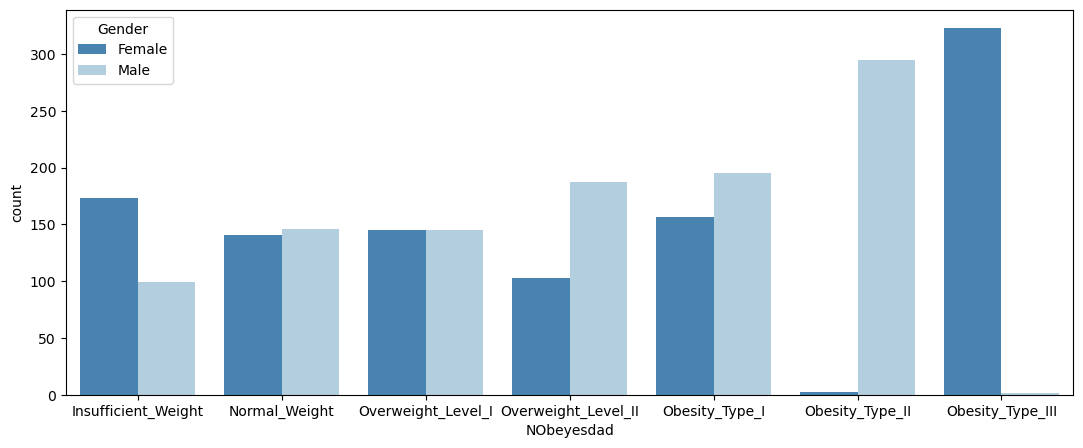

In [32]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

### 1.17.2. Overweight and family history

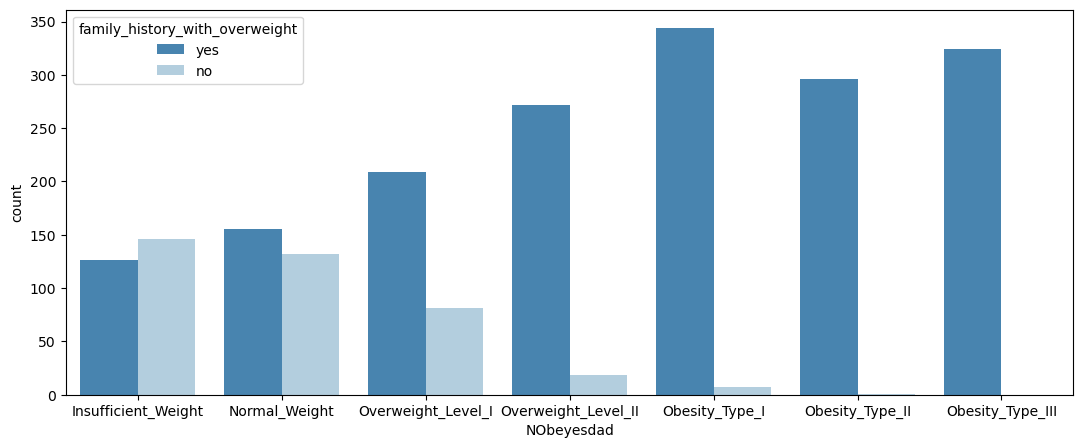

In [33]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

It seems obesity runs in the family. All those categorised as overweight or obese had family members suffering from weight problems.

### 1.17.3. Overweight and high calories food

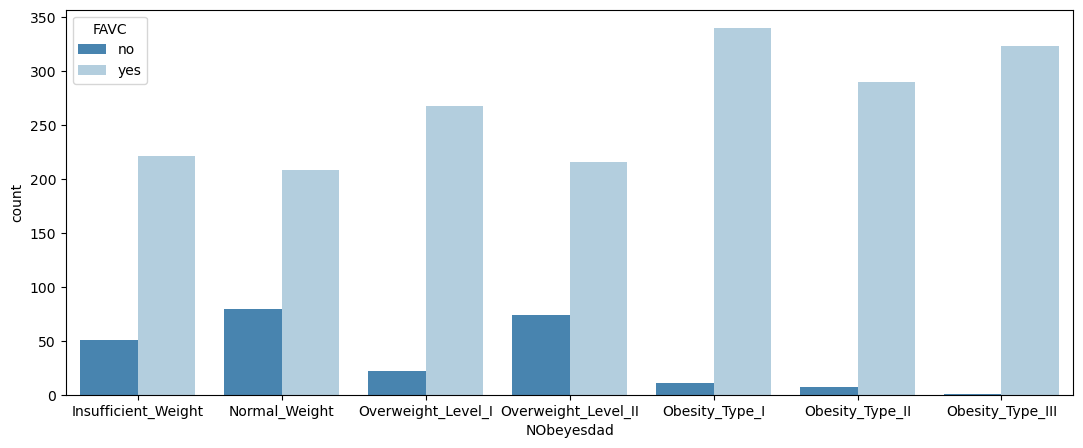

In [34]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Both normal weight and overweight/obese people consume high calories food. Perhaps food quantity makes the difference and affects body fats.

### 1.17.4. Overweight and food between meals

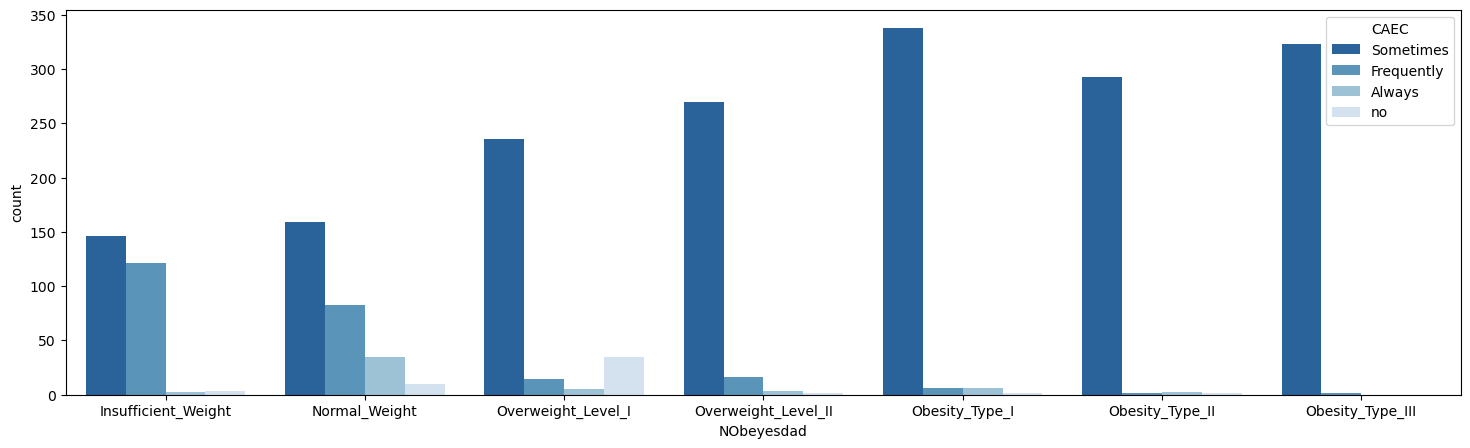

In [35]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Weight of those who "frequently" or "always" get food between meals does not seem to be abnormal. Only people having snaks from time to time go into "Overweight" or "Obesity" categories.

### 1.17.5. Overwweight and smoking

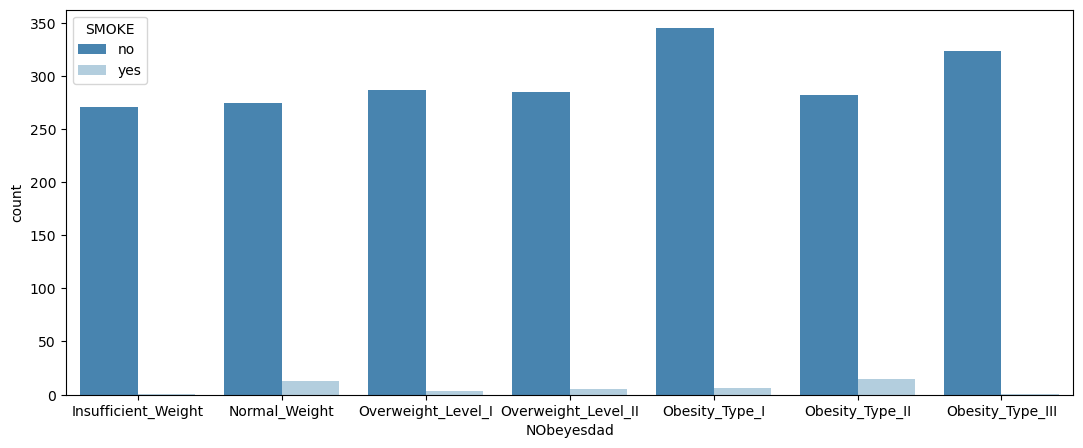

In [36]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

It seems smoking is not a predictor or does not affect body weight. There is a tiny number of smokers who could be both normal and overweight.

### 1.17.6. Overweight and monitoring calories

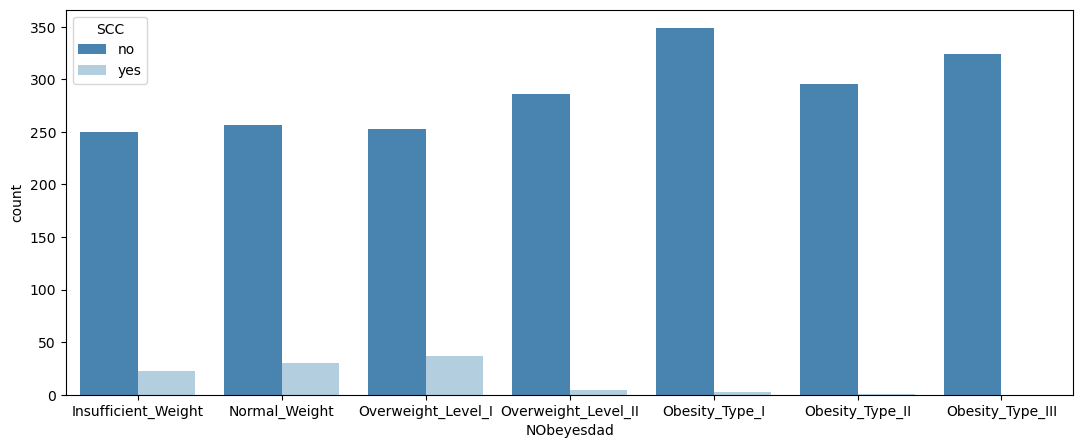

In [37]:
plt.figure(figsize = (13, 5))
cross_plot(df, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

People who tend to monitor their calories intake are less likely to get excess weight.

### 1.17.7. Overweight and alcohol

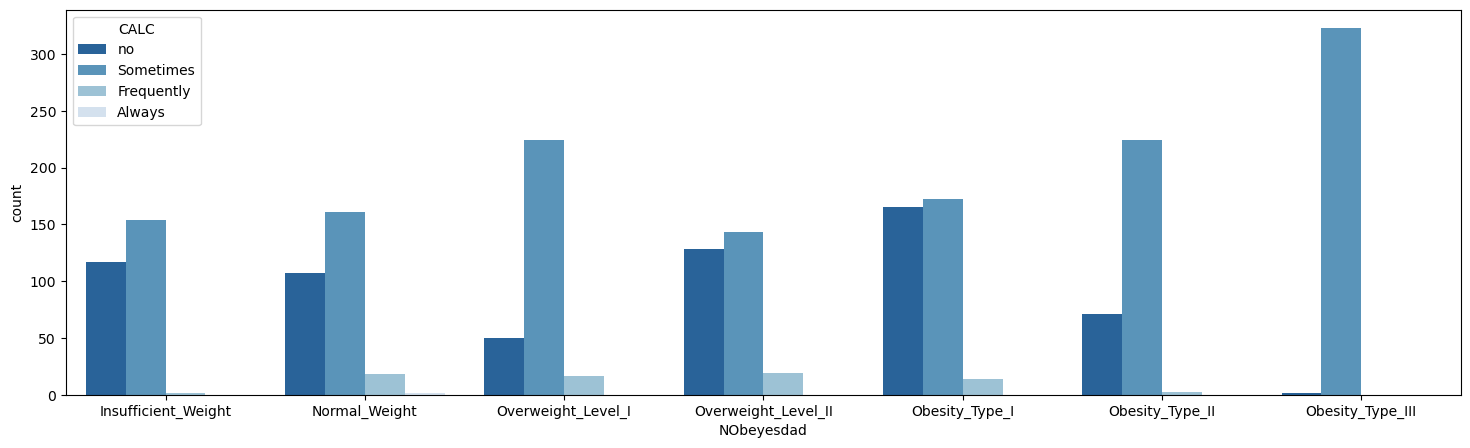

In [38]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

There might exist a weak link between alcohol and obesity. The data suggest that people who "sometimes" drink alcohol could face weight propblems.

### 1.17.8. Overweight and means of transport

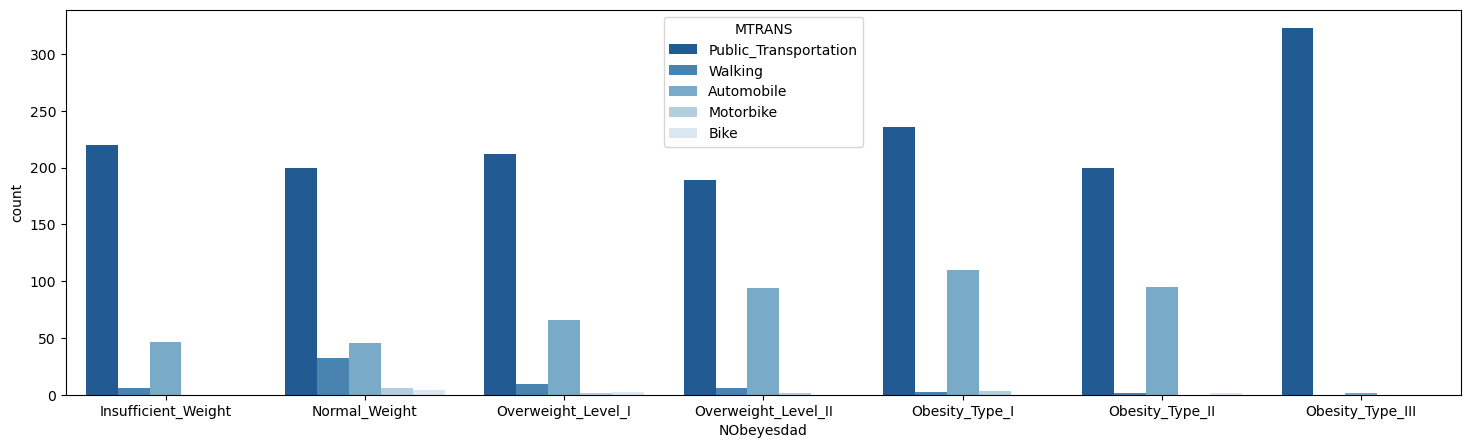

In [39]:
plt.figure(figsize = (18, 5))
cross_plot(df, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Transportation seems does not (significantly) affect a person's weight. Both slim, normal and overweight people use public transport; all groups rely on cars as well.

## 1.18. Boxplot and correlation

In [40]:
df_numeric = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

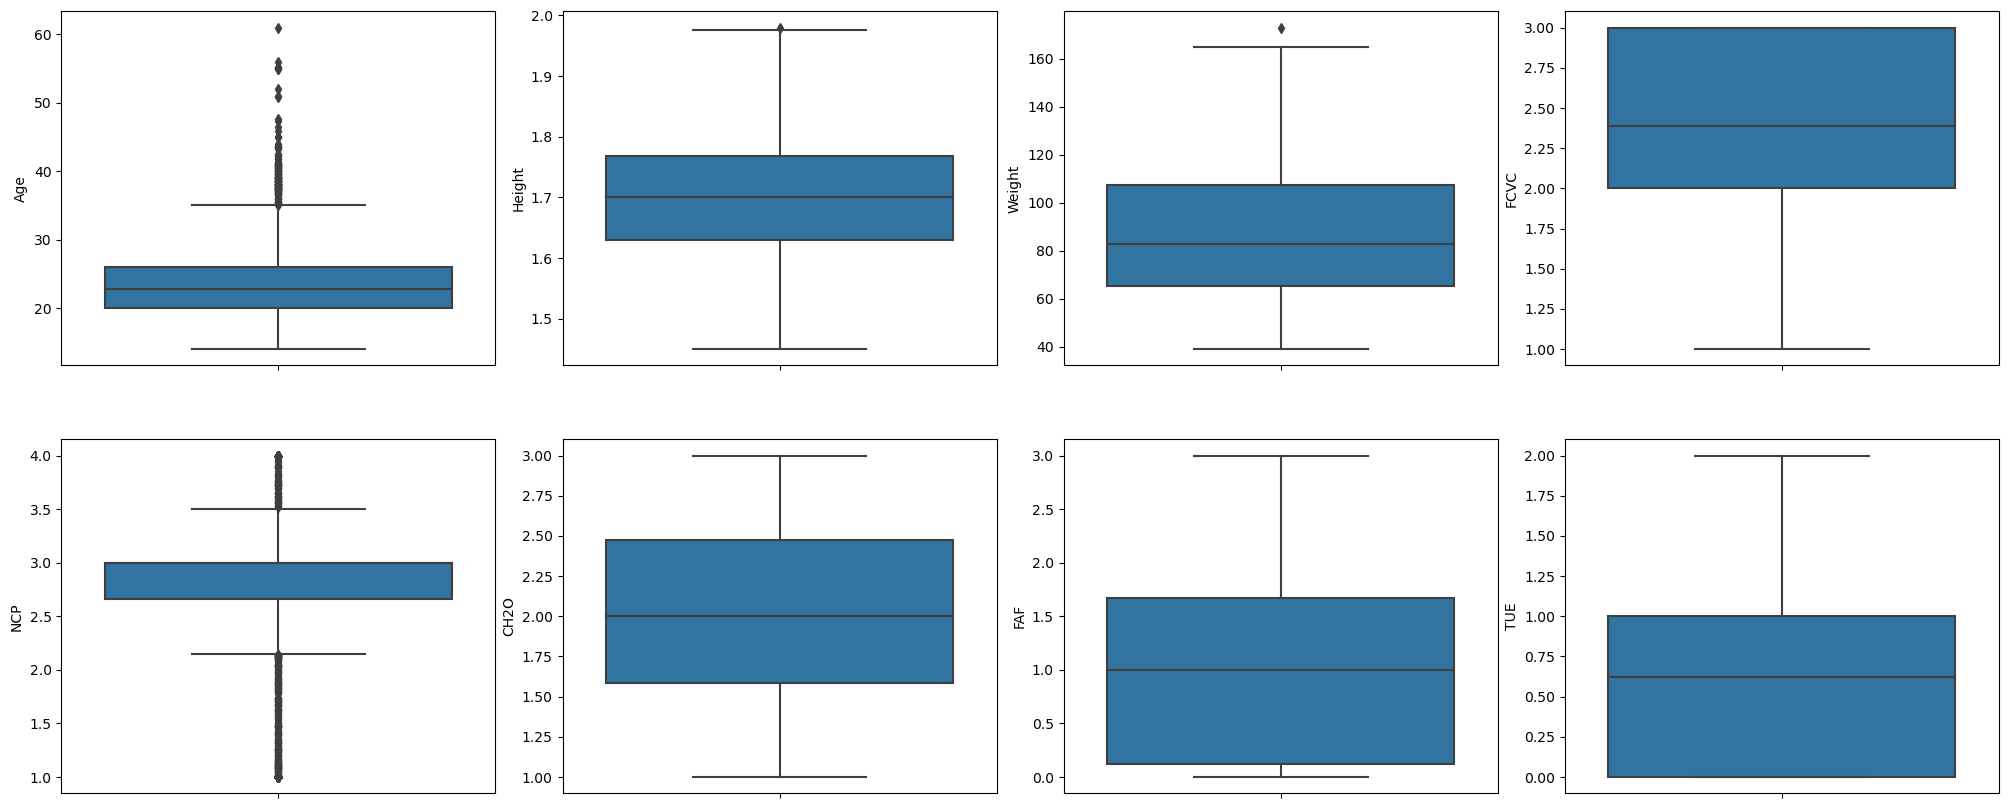

In [41]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in df_numeric.items():
    sns.boxplot(y = k, data = df_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

The boxplots above show quartiles and outliers. Distributions in the last 5 columns are not taken into account.

The first boxplot suggests that there are outliers in the "Age" column. However, 40, 50 or 60 years of age are normal values (they are not extreme or errors) and for this reason these are not removed. "Height" does not seem to have outliers, and "Weight" has only a couple ones. These are not treated either.

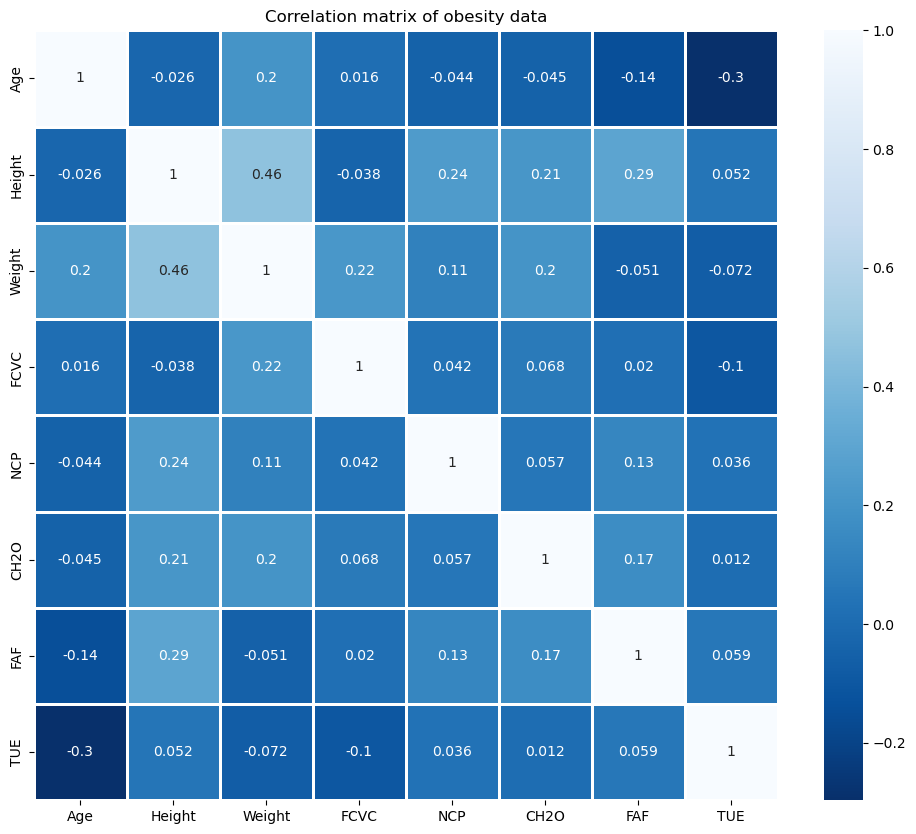

In [42]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

(Linear) correlation between numeric features is weak or nonexistent. Thus, all features remain in the table.

# 2. Data Preprocessing 

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set.

**Need of Data Preprocessing:**
- For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set, as we already checked earlier our dataset doesnot have any null value.
- Data is limited so model will need to perform well with limited amount of data
- Model will need to handle dummy variables well and not be dependent on ratio data
- The ordinal variables may or may not be helful to the model
- The data is pretty wide but not very deep, so reducing the factors may be necessary.

## 2.1. Making a copy of the dataframe

In [43]:
df_prep = df.copy()
ord_feature_list= ["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS", "NObeyesdad"]

## 2.2. Encoding

- Encode categorical features as an integer array.
- The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

In [44]:
df_ord = df_prep[ord_feature_list]

enc = OrdinalEncoder()
enc.fit(df_ord)
df_ord_arr=enc.transform(df_ord)

encoded_cat_df=pd.DataFrame(df_ord_arr, columns=ord_feature_list)
encoded_cat_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2107,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2108,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2109,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0


**Changes**
- **Gender column** - Female is represented by 0 and male is represented by 1.
- **family_history_with_overweight** - yes is represented by 1 and no is represented by 0.
- Other categorical variables are changed in a similar way.

In [45]:
train_df_final = pd.concat( [df[df.columns.difference(ord_feature_list)] , encoded_cat_df ], axis= 1)

## 2.3. Splitting train-test sets

- Split arrays or matrices into random train and test subsets.
- **Why we are doing this** : We are splitting the dataset into train and test so that we can pass them through different ML algorithms which we will proceed for in the further sections. The **training dataset** is given to the algorithm and on the basis of the training dataset , prediction of the **test dataset** takes place.

In [46]:
# split df to X and Y
y = train_df_final.loc[:, 'NObeyesdad'].values
X = train_df_final.drop('NObeyesdad', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1688, 16), (423, 16), (1688,), (423,))

We have 1688 rows out of 2111 rows as training dataset and 423 rows as test dataset.

## 2.4. Normalizing data

- Data normalization is the systematic process of grouping similar values into one common value, bringing greater context and accuracy to your marketing database. Basically, data normalization formats your data to look and read the same across all records in a database. Here all the values will be between 0 and 1.
- **Why are we doing this:** Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

In [49]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [50]:
X_train_normalized_df

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.245550,0.206025,0.047985,1.000000,0.412658,0.666667,0.376538,0.539261,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1,0.191489,0.500000,0.333333,1.000000,0.377358,0.000000,1.000000,0.164021,0.0,0.0,0.0,0.666667,0.0,0.0,0.5,0.75
2,0.533806,0.502597,0.108438,0.851228,0.566038,0.666667,0.209528,0.656324,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.00
3,0.159611,0.675604,0.082277,1.000000,0.679002,0.666667,0.456680,0.929958,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
4,0.190119,0.501785,0.419850,1.000000,0.532655,0.666667,0.208558,0.129869,0.0,1.0,1.0,0.333333,0.0,0.0,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,0.234043,0.500000,0.666667,0.500000,0.226415,0.000000,0.000000,0.131217,0.0,0.0,1.0,0.666667,0.0,0.0,0.5,0.75
1684,0.207358,0.500000,0.543971,0.268752,0.578815,0.666667,0.315711,0.642361,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1685,0.094117,0.693195,0.514877,1.000000,0.538606,0.666667,0.450033,0.720039,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1686,0.170139,0.328041,0.142590,1.000000,0.534458,0.921842,0.277983,0.097514,0.0,0.0,0.0,0.333333,0.0,0.0,0.5,0.75


In [51]:
X_test_normalized_df

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.187546,0.500000,0.030781,0.500000,0.502432,0.666667,0.733248,0.300884,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
1,0.122464,0.256018,0.101241,0.814396,0.174204,0.587628,0.001615,0.203847,0.0,0.0,1.0,0.666667,0.0,1.0,0.5,0.75
2,0.253601,0.011664,0.016977,1.000000,0.304645,0.666667,0.500000,0.517432,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
3,0.136989,0.693995,0.283572,1.000000,0.671326,0.666667,0.328246,0.936148,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
4,0.425532,1.000000,0.666667,0.500000,0.452830,0.666667,0.000000,0.369048,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.085106,0.500000,1.000000,0.500000,0.660377,0.666667,0.000000,0.270635,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.00
419,0.172086,0.548375,0.181521,0.674373,0.666287,0.666667,0.338440,0.552174,1.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75
420,0.124806,0.791082,0.666667,0.560093,0.585528,1.000000,0.755305,0.134257,1.0,1.0,1.0,0.666667,0.0,0.0,1.0,0.00
421,0.085106,0.500000,0.666667,0.000000,0.339623,0.666667,1.000000,0.196826,0.0,1.0,1.0,0.666667,0.0,0.0,0.5,0.75


Both the training dataset and test dataset have now values of all attributes between 0 and 1.

## 2.5. Cross-validation (k-fold)

- Randomly partition the data into k mutually exclusive subsets, each approximately equal size
- At i-th iteration, use Di as test set and others as training set.

In [54]:
# cross-validation with 10 splits
cv = StratifiedShuffleSplit(n_splits=10, random_state = 42, test_size=0.2)

In [55]:
def display_test_scores(test, pred, prob):
    print("\n\n   TEST SCORES\n")
    print("===================================================================\n")
    
    #print accuracy
    accuracy = accuracy_score(test, pred)
    print("ACCURACY: {:.4f}\n".format(accuracy))
    print("\n")
    print("---------------------------------------------------\n")


    #print confusion matrix
    print ("CONFUSION MATRIX:\n")
    conf_mat = confusion_matrix(test, pred)
    cm_df = pd.DataFrame(conf_mat)
    
    #draw cm 
    
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label',)
    plt.show()    
    print("\n")
    print("\n")
    print("---------------------------------------------------\n")
    
    #print FP, FN
    print("FALSE POSITIVES:\n")
    fp = conf_mat[1][0]
    pos_labels = conf_mat[1][0]+conf_mat[1][1]
    print("{} out of {} positive labels ({:.4f}%)\n".format(fp, pos_labels,fp/pos_labels))
    print("\n")
    print("---------------------------------------------------\n")

    print("FALSE NEGATIVES:\n")
    fn = conf_mat[0][1]
    neg_labels = conf_mat[0][1]+conf_mat[0][0]
    print("{} out of {} negative labels ({:.4f}%)\n".format(fn, neg_labels, fn/neg_labels))
    print("\n")
    print("--------------------------------------------------\n")
    
    #roc
    roc = roc_auc_score(test, prob, multi_class="ovr", average="macro")
    print("ROC-AUC score:({:.4f}%)\n".format(roc))
    print("\n")
    
    skplt.metrics.plot_roc(pred, prob)
    plt.show()
    
    print("--------------------------------------------------\n")
    

    #print classification report
    print("PRECISION, RECALL, F1 scores:\n\n")
    print("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return false_indexes

The function above will display test scores and return result string and indexes of false samples.

# 3. Machine Learning models

In [56]:
# Classification
X_train= X_train_normalized_df
X_test= X_test_normalized_df

## 3.1. Decision tree

- Decision Tree is also the most commonly used approach that are used for supervised learning. One of the benefits of Decision Tree is that it can solve both regression and classification tasks.
- Root node: It is starting/initial node of the tree. It represents the entire sample and it further gets split into child nodes(interior nodes)
- Interior nodes: the interior nodes represents the features of the dataset and its branches represent the decision rules that need to be taken.
- Leaf Nodes: It is used to represent the outcome of the regression classification model.

The best parameters are {'class_weight': 'balanced', 'criterion': 'entropy'} with a score of 0.9470


   TEST SCORES


ACCURACY: 0.9385



---------------------------------------------------

CONFUSION MATRIX:



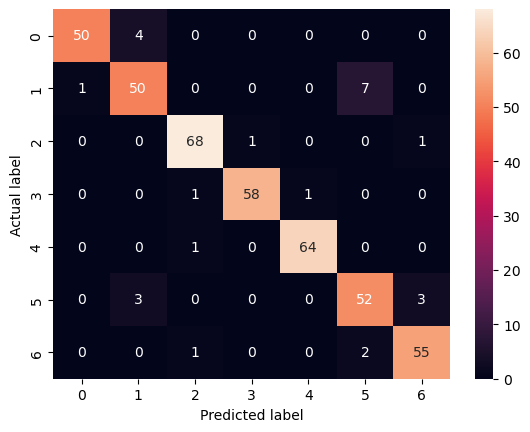





---------------------------------------------------

FALSE POSITIVES:

1 out of 51 positive labels (0.0196%)



---------------------------------------------------

FALSE NEGATIVES:

4 out of 54 negative labels (0.0741%)



--------------------------------------------------

ROC-AUC score:(0.9631%)





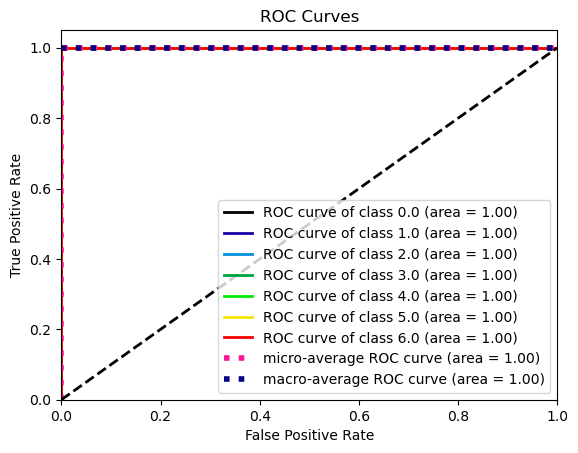

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        54
         1.0       0.88      0.86      0.87        58
         2.0       0.96      0.97      0.96        70
         3.0       0.98      0.97      0.97        60
         4.0       0.98      0.98      0.98        65
         5.0       0.85      0.90      0.87        58
         6.0       0.93      0.95      0.94        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



(array([ 20,  49,  58,  69,  84,  91, 123, 140, 150, 152, 214, 216, 260,
        263, 264, 268, 279, 284, 289, 299, 306, 328, 362, 403, 405, 421],
       dtype=int64),)

In [58]:
#parameters
param_grid = {'criterion':['gini', 'entropy'],
              "class_weight": [None, "balanced"],
              }

#Decision Tree
grid_1 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, verbose=False, n_jobs= -1, cv= cv)
grid_1.fit(X_train, y_train)

#print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

#prediction results
y_pred = grid_1.predict(X_test)
y_prob = grid_1.predict_proba(X_test)
display_test_scores(y_test, y_pred, y_prob)

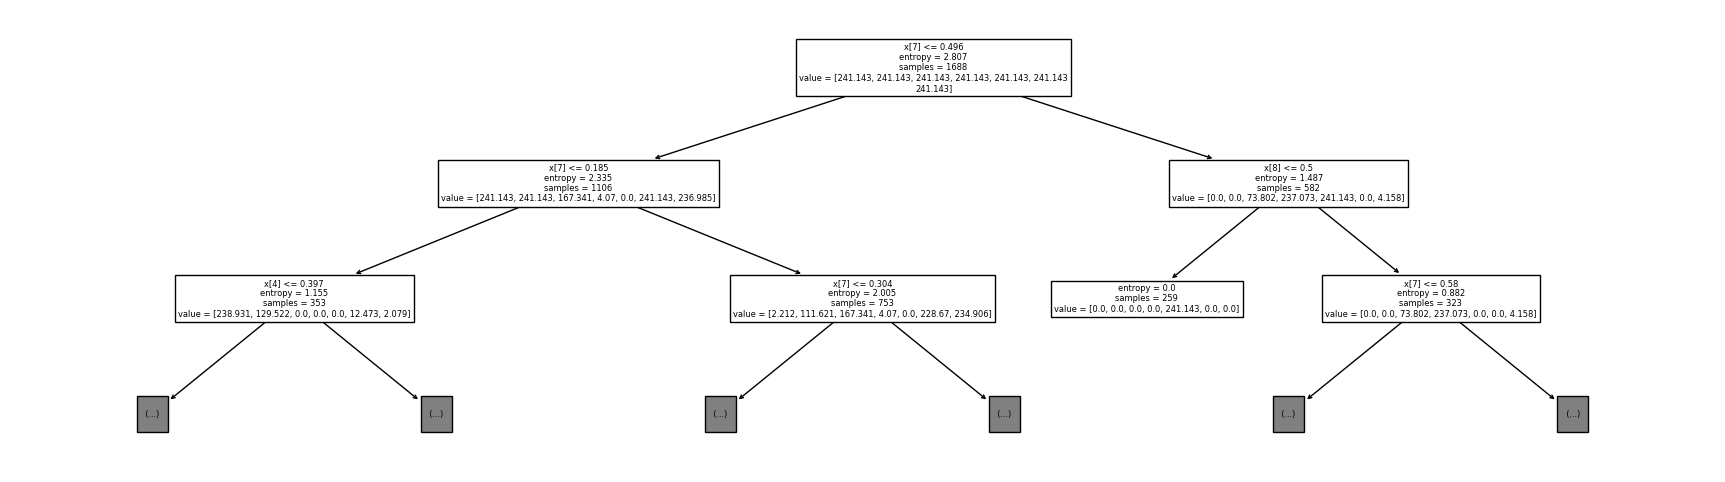

In [59]:
plt.figure(figsize = (22, 6))
plot_tree(grid_1.best_estimator_, max_depth= 2)
plt.show()

**Inference**
- In decision tree we use entropy as a parameter to infer the best result here the entropy or information gain is the best suited value for calculating the prediction with accuracy.
- The attribute with the highest information gain will produce the best split as it’s doing the best job at classifying the training data according to its target classification the attribute x[7] value as shown in the graph that is Weight is that attribute.

## 3.2. Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

- **Bayes Theorem:** Bayes Theorem finds the probability of an event occurring given the probability of another event that has already occurred.
- **Gaussian Naive Bayes:** In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution.
- A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values



----------- GaussianNB() --------------
The best parameters are {} with a score of 0.5754



   TEST SCORES


ACCURACY: 0.6194



---------------------------------------------------

CONFUSION MATRIX:



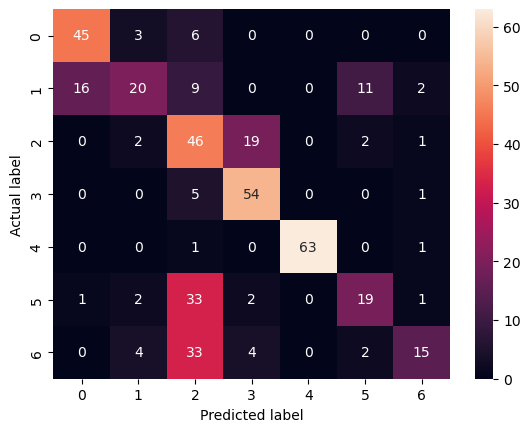





---------------------------------------------------

FALSE POSITIVES:

16 out of 36 positive labels (0.4444%)



---------------------------------------------------

FALSE NEGATIVES:

3 out of 48 negative labels (0.0625%)



--------------------------------------------------

ROC-AUC score:(0.9236%)





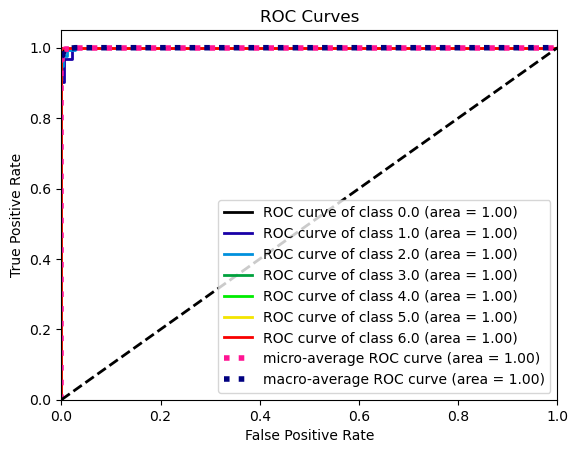

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78        54
         1.0       0.65      0.34      0.45        58
         2.0       0.35      0.66      0.45        70
         3.0       0.68      0.90      0.78        60
         4.0       1.00      0.97      0.98        65
         5.0       0.56      0.33      0.41        58
         6.0       0.71      0.26      0.38        58

    accuracy                           0.62       423
   macro avg       0.67      0.61      0.60       423
weighted avg       0.66      0.62      0.61       423



----------- MultinomialNB() --------------
The best parameters are {} with a score of 0.4071



   TEST SCORES


ACCURACY: 0.4113



---------------------------------------------------

CONFUSION MATRIX:



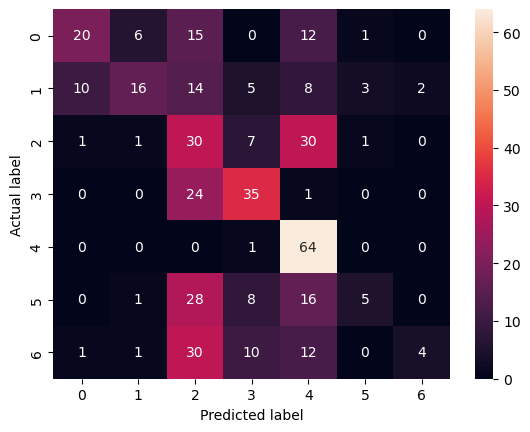





---------------------------------------------------

FALSE POSITIVES:

10 out of 26 positive labels (0.3846%)



---------------------------------------------------

FALSE NEGATIVES:

6 out of 26 negative labels (0.2308%)



--------------------------------------------------

ROC-AUC score:(0.8253%)





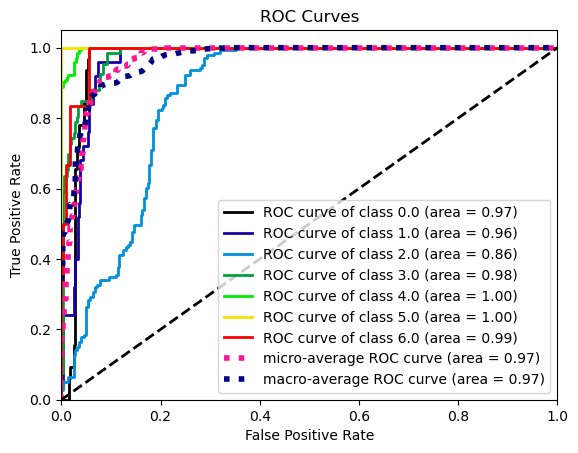

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.62      0.37      0.47        54
         1.0       0.64      0.28      0.39        58
         2.0       0.21      0.43      0.28        70
         3.0       0.53      0.58      0.56        60
         4.0       0.45      0.98      0.62        65
         5.0       0.50      0.09      0.15        58
         6.0       0.67      0.07      0.12        58

    accuracy                           0.41       423
   macro avg       0.52      0.40      0.37       423
weighted avg       0.51      0.41      0.37       423



----------- ComplementNB() --------------
The best parameters are {} with a score of 0.3899



   TEST SCORES


ACCURACY: 0.3901



---------------------------------------------------

CONFUSION MATRIX:



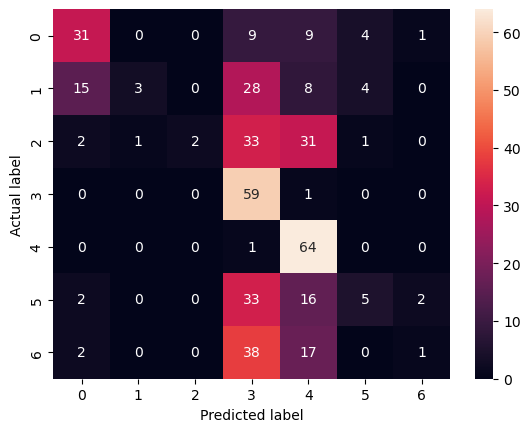





---------------------------------------------------

FALSE POSITIVES:

15 out of 18 positive labels (0.8333%)



---------------------------------------------------

FALSE NEGATIVES:

0 out of 31 negative labels (0.0000%)



--------------------------------------------------

ROC-AUC score:(0.8287%)





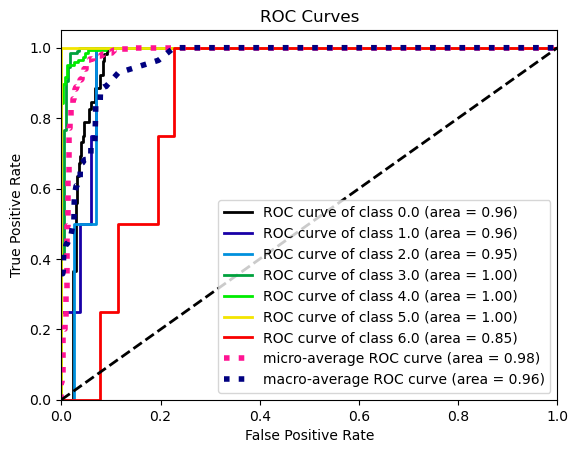

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58        54
         1.0       0.75      0.05      0.10        58
         2.0       1.00      0.03      0.06        70
         3.0       0.29      0.98      0.45        60
         4.0       0.44      0.98      0.61        65
         5.0       0.36      0.09      0.14        58
         6.0       0.25      0.02      0.03        58

    accuracy                           0.39       423
   macro avg       0.53      0.39      0.28       423
weighted avg       0.54      0.39      0.28       423



In [60]:
# Naive-Bayes with different approaches
nb_list = [ GaussianNB(), MultinomialNB(), ComplementNB()]

for nb in nb_list:
    print("\n\n-----------", str(nb), "--------------")
    
    # parameters 
    parameters = {}

    # grid search for parameters
    grid_2 = GridSearchCV(estimator=nb, param_grid=parameters, cv=cv, n_jobs=-1)
    grid_2.fit(X_train, y_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid_2.best_params_, grid_2.best_score_))

    # prediction results
    y_pred = grid_2.predict(X_test)
    y_prob = grid_2.predict_proba(X_test)

    # print accuracy metrics
    display_test_scores(y_test, y_pred, y_prob)

**Inference**
- Using the dataset we have calculated Gaussian, Multinomial are complemented and it can be clearly seen that the best accuracy was given by gaussian naive bayes.
- Biggest disadvantage is that the requirement of predictors to be independent, but here the contrary example is Weight. This is the reason for low score.

## 3.3. SVM (Support Vector Machine)

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. The best hyperplane is the one that represents the largest separation or margin between the two classes. So we choose the hyperplane whose distance from it to the nearest data point on each side is maximized.

The best parameters are {'C': 100, 'kernel': 'linear'} with a score of 0.9583



   TEST SCORES


ACCURACY: 0.9716



---------------------------------------------------

CONFUSION MATRIX:



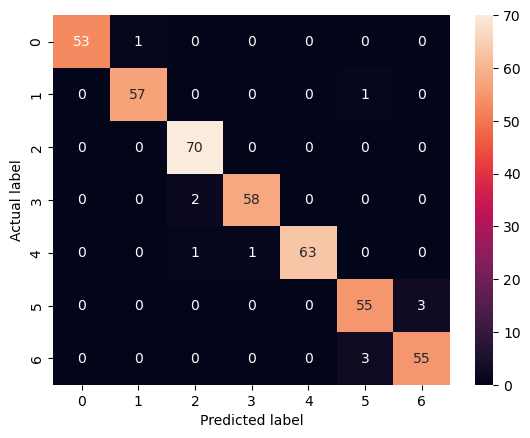





---------------------------------------------------

FALSE POSITIVES:

0 out of 57 positive labels (0.0000%)



---------------------------------------------------

FALSE NEGATIVES:

1 out of 54 negative labels (0.0185%)



--------------------------------------------------

ROC-AUC score:(0.9981%)





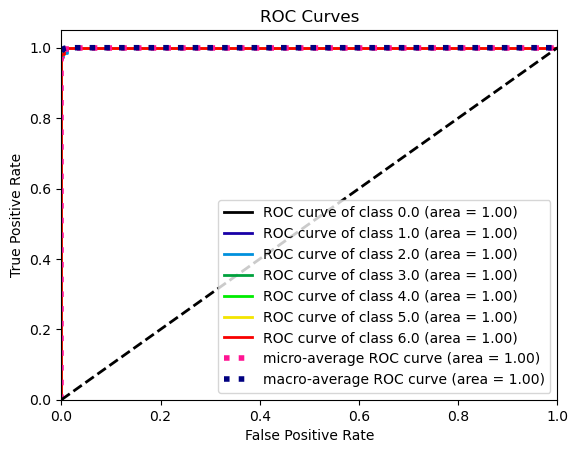

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        54
         1.0       0.98      0.98      0.98        58
         2.0       0.96      1.00      0.98        70
         3.0       0.98      0.97      0.97        60
         4.0       1.00      0.97      0.98        65
         5.0       0.93      0.95      0.94        58
         6.0       0.95      0.95      0.95        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



(array([ 21,  59,  69,  84, 123, 144, 309, 320, 328, 337, 364, 403],
       dtype=int64),)

In [61]:
# SVM classifier
svm = SVC(tol=1e-5, random_state=0, probability=True)

# parameters 
parameters = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01, 0.1, 1, 10, 100],
            }

# grid search for parameters
grid_3 = GridSearchCV(estimator=svm, param_grid=parameters, cv=cv, n_jobs=-1)
grid_3.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_3.best_params_, grid_3.best_score_))

# prediction results
y_pred = grid_3.predict(X_test)
y_prob = grid_3.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

## 3.4. KNN (K-Nearest Neighbors)

The K-Nearest Neighbors classifier (KNN) is a non-parametric supervised machine learning algorithm. It’s distance-based: it classifies objects based on their proximate neighbors’ classes. The k-nearest neighbours algorithm is also non-linear. In contrast to simpler models like linear regression, it will work well with data in which the relationship between the independent variable (x) and the dependent variable (y) is not a straight line.

The best parameters are {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1} with a score of 0.8420



   TEST SCORES


ACCURACY: 0.8322



---------------------------------------------------

CONFUSION MATRIX:



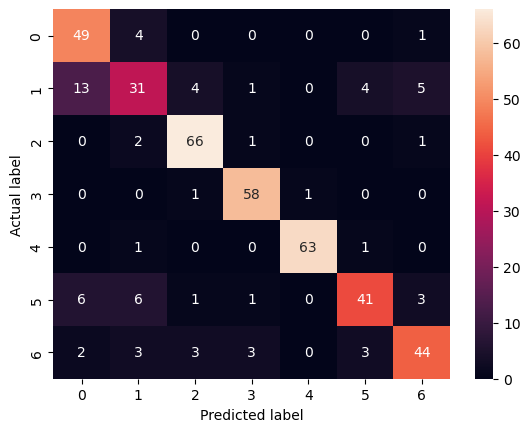





---------------------------------------------------

FALSE POSITIVES:

13 out of 44 positive labels (0.2955%)



---------------------------------------------------

FALSE NEGATIVES:

4 out of 53 negative labels (0.0755%)



--------------------------------------------------

ROC-AUC score:(0.9478%)





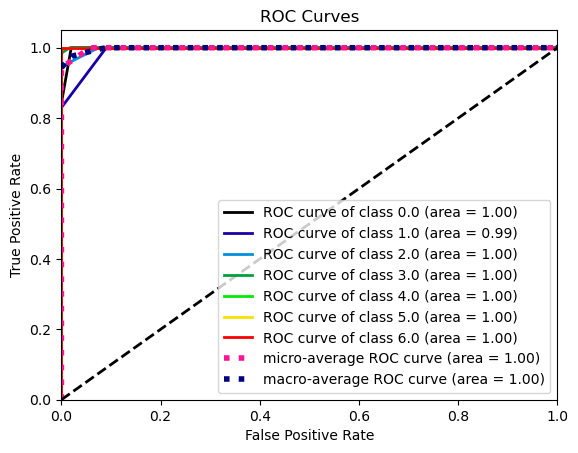

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79        54
         1.0       0.66      0.53      0.59        58
         2.0       0.88      0.94      0.91        70
         3.0       0.91      0.97      0.94        60
         4.0       0.98      0.97      0.98        65
         5.0       0.84      0.71      0.77        58
         6.0       0.81      0.76      0.79        58

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.83      0.83      0.83       423



(array([  0,  10,  20,  23,  25,  32,  33,  40,  49,  55,  56,  57,  63,
         65,  69,  75,  82,  84,  89,  91,  98, 103, 107, 109, 113, 122,
        123, 125, 126, 128, 152, 173, 183, 184, 186, 189, 193, 209, 214,
        223, 232, 244, 251, 264, 270, 279, 286, 292, 295, 304, 306, 309,
        315, 320, 328, 330, 335, 351, 354, 364, 366, 370, 372, 383, 384,
        393, 399, 409, 418, 421, 422], dtype=int64),)

In [62]:
knn = KNeighborsClassifier()
# parameters 
parameters = {
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                "n_neighbors": list(range(0, 25)),
                "metric": ['euclidean', 'manhattan', 'chebyshev'],
                "p": [1,2],
    }

# grid search for parameters
grid_4 = GridSearchCV(estimator=knn, param_grid=parameters, cv=cv, n_jobs=-1)
grid_4.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_4.best_params_, grid_4.best_score_))

# prediction results
y_pred = grid_4.predict(X_test)
y_prob = grid_4.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

## 3.5. Logistic Regression

Logistic regression is used to obtain odds ratio in the presence of more than one explanatory variable. The procedure is quite similar to multiple linear regression, with the exception that the response variable is binomial. The result is the impact of each variable on the odds ratio of the observed event of interest. The main advantage is to avoid confounding effects by analyzing the association of all variables together.

The best parameters are {'C': 100, 'max_iter': 250, 'penalty': 'l2'} with a score of 0.9180



   TEST SCORES


ACCURACY: 0.9338



---------------------------------------------------

CONFUSION MATRIX:



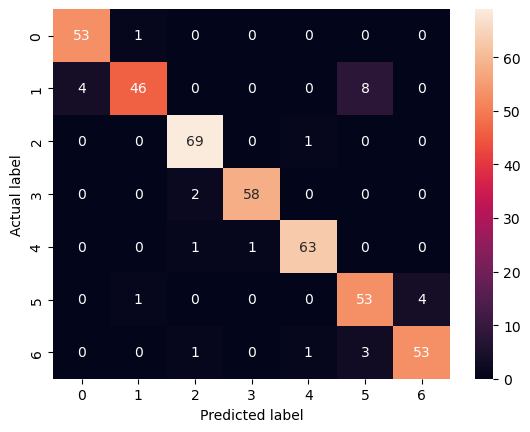





---------------------------------------------------

FALSE POSITIVES:

4 out of 50 positive labels (0.0800%)



---------------------------------------------------

FALSE NEGATIVES:

1 out of 54 negative labels (0.0185%)



--------------------------------------------------

ROC-AUC score:(0.9928%)





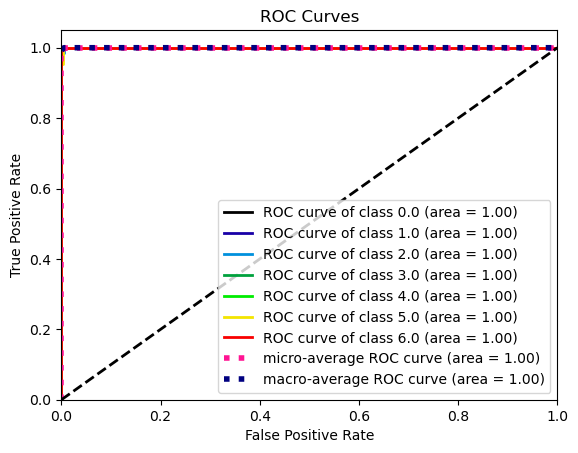

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        54
         1.0       0.96      0.79      0.87        58
         2.0       0.95      0.99      0.97        70
         3.0       0.98      0.97      0.97        60
         4.0       0.97      0.97      0.97        65
         5.0       0.83      0.91      0.87        58
         6.0       0.93      0.91      0.92        58

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.94      0.93      0.93       423



(array([ 21,  22,  23,  37,  43,  55,  57,  59,  69,  84, 120, 123, 128,
        133, 140, 144, 212, 231, 279, 286, 309, 320, 328, 340, 354, 364,
        371, 421], dtype=int64),)

In [63]:
logit = LogisticRegression(solver='lbfgs', random_state=0)
# parameters 
parameters = {
                "penalty":['l1', 'l2'],
                "C": [0.01, 0.1, 1, 10, 100],
                "max_iter": [250],
                "penalty":["l1","l2"]
             }

# grid search for parameters
grid_5 = GridSearchCV(estimator=logit, param_grid=parameters, cv=cv, n_jobs=-1)
grid_5.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_5.best_params_, grid_5.best_score_))

# prediction results
y_pred = grid_5.predict(X_test)
y_prob = grid_5.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

**Inference**

From this model we can infer that it can be used for multiclass classifications also therefore this model was the one with the most close prediction, and Logistic Regression can derive confidence level (about its prediction), whereas KNN can only output the labels.

## 3.6. Random Forest

The random forest is a classification algorithm consisting of many decision trees. It uses bagging and features randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

The best parameters are {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': None, 'max_samples': None, 'n_estimators': 200} with a score of 0.9624


   TEST SCORES


ACCURACY: 0.9504



---------------------------------------------------

CONFUSION MATRIX:



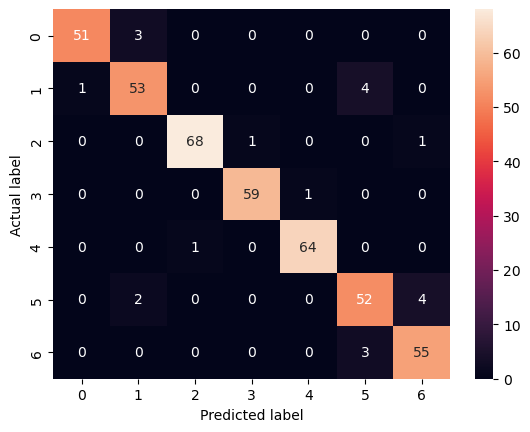





---------------------------------------------------

FALSE POSITIVES:

1 out of 54 positive labels (0.0185%)



---------------------------------------------------

FALSE NEGATIVES:

3 out of 54 negative labels (0.0556%)



--------------------------------------------------

ROC-AUC score:(0.9961%)





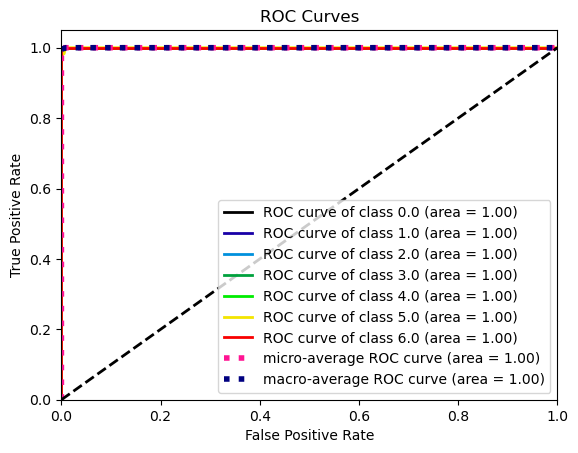

--------------------------------------------------

PRECISION, RECALL, F1 scores:


              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        54
         1.0       0.91      0.91      0.91        58
         2.0       0.99      0.97      0.98        70
         3.0       0.98      0.98      0.98        60
         4.0       0.98      0.98      0.98        65
         5.0       0.88      0.90      0.89        58
         6.0       0.92      0.95      0.93        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



(array([ 49,  69,  84,  91, 123, 140, 164, 214, 263, 264, 268, 279, 284,
        289, 306, 328, 345, 360, 362, 403, 421], dtype=int64),)

In [64]:
rf = RandomForestClassifier(random_state=0)

# parameters 
parameters = {
                "bootstrap": [True,False],
                "max_features": [None, "sqrt", "log2"],
                "class_weight": [None, "balanced", "balanced_subsample"],
                "max_samples": [None, 0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10, 100, 200],
                'criterion':['gini','entropy'],
                
}

# grid search for parameters
grid_6 = GridSearchCV(estimator=rf, param_grid=parameters, cv=cv, n_jobs=-1)
grid_6.fit(X_train, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test)
y_prob = grid_6.predict_proba(X_test)

# print accuracy metrics
display_test_scores(y_test, y_pred, y_prob)

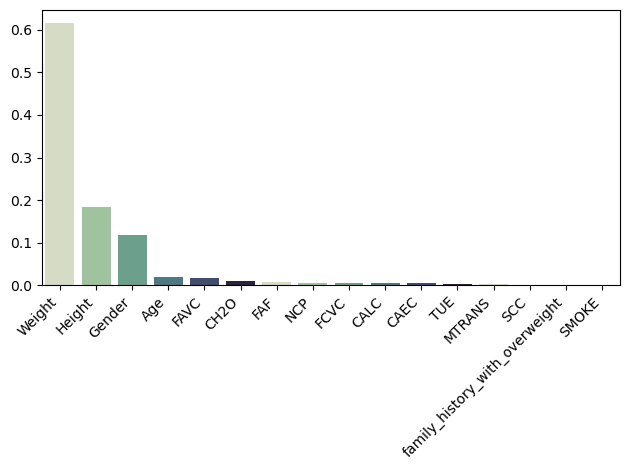

In [65]:
feature_imp = pd.Series(grid_6.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp, palette=sns.cubehelix_palette(start=.5, rot=-.75,))

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Inference**

From this model we can infer that our prediction is most dependent on weight followed by height and gender.

In [68]:
data = {'Accuracy': [0.9385,0.6194,0.9716,0.8322,0.9314,0.9504],
        'ROC_AUC': [0.9631, 0.9236, 0.9981, 0.9478, 0.9931,0.9961],
        'Precision':[0.94,0.66,0.97,0.83,0.93,0.95],
        'Recall':[0.94,0.62,0.97,0.83,0.93,0.95],
        'F1-Score':[0.94,0.61,0.97,0.83,0.93,0.95]};
        
        

df = pd.DataFrame(data, index=['Decision Tree', 'Naive Bayes(Gaussian)', 'SVM', 'K-Nearest Neighbour', 'Logitic Regression','Random Forest classifier'])

df

,Accuracy,ROC_AUC,Precision,Recall,F1-Score
Decision Tree,0.9385,0.9631,0.94,0.94,0.94
Naive Bayes(Gaussian),0.6194,0.9236,0.66,0.62,0.61
SVM,0.9716,0.9981,0.97,0.97,0.97
K-Nearest Neighbour,0.8322,0.9478,0.83,0.83,0.83
Logitic Regression,0.9314,0.9931,0.93,0.93,0.93
Random Forest classifier,0.9504,0.9961,0.95,0.95,0.95


# 4. Conclusion

- The result is most dependant on weight i.e it is the most significant attribute, which was inferred from Random Forest Classifier.
- Out of all the classifications, Support Vector Machine is the most accurate whereas Naive Bayes is the least accurate.
- The data is classified with best accuracy of 97.17%

# Reference

[1] Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.